In [77]:
import networkx as nx
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
%pylab inline

import matplotlib.pyplot as plt

%matplotlib inline 

Populating the interactive namespace from numpy and matplotlib


In [78]:
# creating a graph with netwrokX
# graphs start with capital letters 

G = nx.Graph()

In [79]:
# passign nodes 
# nodes can be added as a list 
# when adding a list of nodes, don't forget the FROM and NODES instead of NODE 

G.add_node(1)
G.add_nodes_from([2,3])
G.add_node(4)

G.nodes()

NodeView((1, 2, 3, 4))

In [80]:
# add edges 
# to add edges, just write EDGE even if you have multiple numbers 

G.add_edge(1,2)
G.add_edge(2,3)

In [81]:
# get graph info

print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 4
Number of edges: 2
Average degree:   1.0000


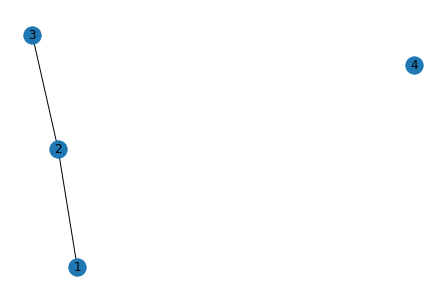

In [82]:
nx.draw(G, with_labels = True)

Name: 
Type: Graph
Number of nodes: 7
Number of edges: 2
Average degree:   0.5714
{5: 'blue', 6: 'red', 7: 'purple'}
{(5, 6): 'best friends'}
{(5, 6): 10}


{(5, 6): Text(-0.11964858058801521, -0.5, 'best friends (10)')}

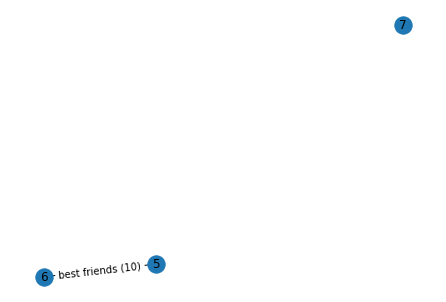

In [84]:
# add attributes at creation 
# nodes 
G.add_node(5, favorite_color = "blue")

# add tuples 
G.add_nodes_from([(6, {"favorite_color" : "red"}), 
                 (7, {"favorite_color" : "purple"})])
print(nx.info(G))

G2 = nx.Graph()
G2.add_node(5, favorite_color='blue')
# G2.add_node(6)
# G2.graph[6] = "red"
G2.add_nodes_from([(6, {'favorite_color' : 'red'}),
                  (7, {'favorite_color' :'purple'})])
print(nx.get_node_attributes(G2,"favorite_color"))
# edges
G2.add_edge(5, 6, weight=100, relationship='best friends', friendship_level=10)
print(nx.get_edge_attributes(G2,"relationship"))
print(nx.get_edge_attributes(G2,"friendship_level"))


# edges 
# add edge takes 3 positional arguments 
# G.add_edge(5, 6, weight=0.9)
position = nx.spring_layout(G2)
nx.draw(G2, position, with_labels = True)
labels = nx.get_edge_attributes(G2, 'relationship')
labels2 =  nx.get_edge_attributes(G2,'friendship_level')

new_labels = {}
for key in labels.keys():
    new_labels[key] = "{} ({})".format(labels[key], labels2[key])
new_labels

# print(position, labels)
nx.draw_networkx_edge_labels(G2, position, edge_labels=new_labels)

In [8]:
# accessing node attributes 
print("Node 5 attributes:", G.node[5])

# accessing edge attributes 
print("Edge 5-6 attribute:", G.edge[5][6])

Node 5 attributes: {'favorite_color': 'blue'}


AttributeError: 'Graph' object has no attribute 'edge'

In [48]:
df = pd.read_excel("Copy of Complete_Mapped_PAO1_MetNetwork_FINAL.xlsx")
df.head(5)

,Abbreviation,KEGG Identifier,Name,Designation(R/H/C),Organism,GPR,Genes,Subsystem,Reactions with MetNames,Reaction,...,Y-Coordinate8,Unique Product 2,X-Coordinate9,Y-Coordinate9,Unique Product 3,X-Coordinate10,Y-Coordinate10,Unique Product 4,X-Coordinate11,Y-Coordinate11
0,ATPM,"unlinked,observed rxn",ATPM,R,pao1,NaN,NaN,None,H2O + ATP -> H+ + ADP + Phosphate,cpd00001[c] + cpd00002[c] -> cpd00067[c] + cp...,...,22.9387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EX_cJB00034(e),exchange rxn,EX L-Sorbose,R,pao1,NaN,,Exchange,L-Sorbose <=>,cJB00034[e] <=>,...,1.5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EX_cpd00001(e),exchange rxn,EX H2O e,R,pao1,NaN,,Exchange,H2O <=>,cpd00001[e] <=>,...,35.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EX_cpd00007(e),exchange rxn,EX oxygen e,R,pao1,NaN,,Exchange,oxygen <=>,cpd00007[e] <=>,...,35.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,EX_cpd00009(e),exchange rxn,EX Phosphate e,R,pao1,NaN,,Exchange,Phosphate <=>,cpd00009[e] <=>,...,35.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


{('ATPM', 'EX Pyruvate'): 50.0162, ('EX H2O e', 'EX CO2 e'): 34.5755}


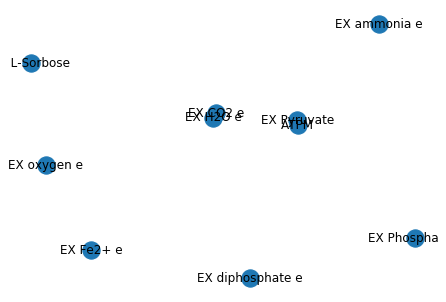

In [63]:
node_list = df['Name'].head(10)
weight_list = df['X-Coordinate'].head(10)
edge_list = [('EX Pyruvate', 'ATPM',weight_list[0]),('EX CO2 e', 'EX H2O e',weight_list[1])]

# node_list
G3 = nx.Graph()
G3.add_nodes_from(node_list)
G3.add_weighted_edges_from(edge_list)
# 
print(nx.get_edge_attributes(G3,"weight"))

nx.draw(G3, with_labels = True)

In [ ]:
GA = nx.from_pandas_dataframe(ga_edges, source = "from", target = "to")